In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exact Solution

In [13]:
def k(n, L):

    num = (2 * n + 1) * np.pi
    den = 2 * L

    return num / den

def exact_sol(T_inf, T_0, N, L, x, t, D):

    sol = T_inf * np.ones_like(x)
    
    for n in range(N):

        num = 2 * (T_0 - T_inf) * ((-1) ** n)
        den = L * k(n, L)
        const = num / den
        cos = np.cos(k(n, L) * x)
        exp = np.exp(-D * (k(n,L) ** 2 * t))

        sol += const * cos * exp

    return sol

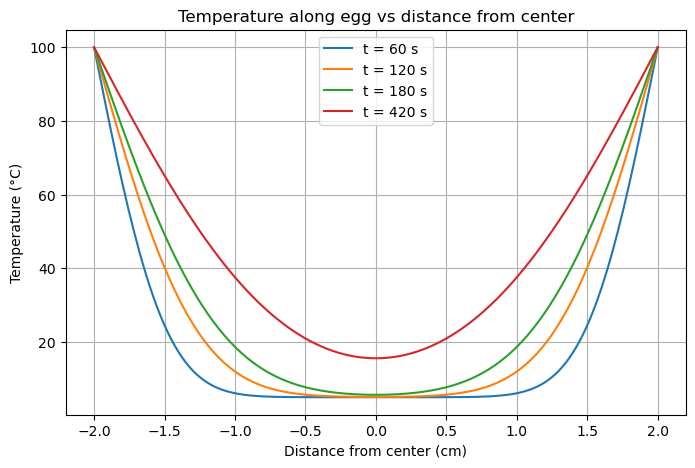

In [14]:
# Parameters
L = 0.02            # half egg length [m]
T_0 = 5             # initial temperature [°C]
T_inf = 100         # water temperature [°C]
D = 1.3e-7          # thermal diffusivity [m^2/s] (approx for egg white)
N = 50        # number of terms in series

# Spatial positions along the egg
x = np.linspace(-L, L, 200)

# Times to plot (seconds)
times = [60, 120, 180, 7*60]  # 1 min, 2 min, 3 min, 4 min

# Plot
plt.figure(figsize=(8,5))
for t in times:
    T = exact_sol(T_inf, T_0, N, L, x, t, D)
    plt.plot(x*100, T, label=f't = {t} s')  # x*100 for cm

plt.xlabel('Distance from center (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature along egg vs distance from center')
plt.legend()
plt.grid(True)
plt.show()

### Forward Euler

In [15]:
def f_euler(T_final, N, M, T_inf, D, T_0, L):
    
    t = np.linspace(0, T_final, N+1)
    
    x = np.linspace(-L, L, M+1)
    
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = D*dt/(dx**2)
    
    U = np.zeros((N+1, M+1))
    U[0,:] = T_0  

    for n in range(0, N):
        # update interior points
        U[n+1,1:-1] = U[n,1:-1] + C*(U[n,:-2] - 2*U[n,1:-1] + U[n,2:])
        
        # Neumann BC at center
        U[n+1,0] = U[n+1,1]
        #U[n+1,0] = U[n,0] + 2*C*(U[n,1] - U[n,0])
        
        # Dirichlet BC at shell
        U[n+1,-1] = T_inf

    return U, x, t

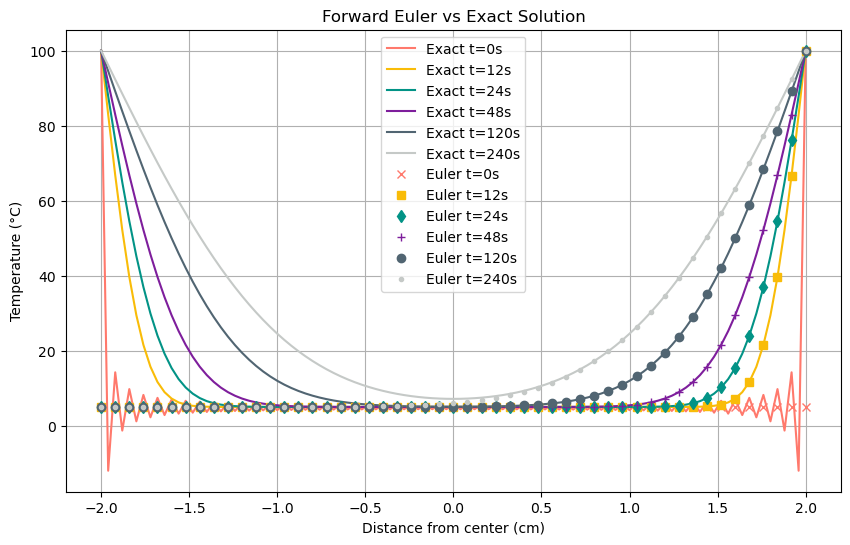

In [16]:
# Parameters
T_final = 240
N = 2000
M = 100
T_inf = 100
D = 1.3e-7
T_0 = 5
L = 0.02

# Run Forward Euler
U, x_array, t_array = f_euler(T_final, N, M, T_inf, D, T_0, L)

# Time indices to display (like the 'disp_times' approach)
disp_times = [0, N//20, N//10, N//5, N//2, N]  # indices of time steps

# Markers and colours
markers = ['x','s','d','+','o','.']
colours = ['xkcd:salmon','xkcd:golden rod','xkcd:teal','xkcd:purple','xkcd:slate', 'xkcd:silver']

# Plot
plt.figure(figsize=(10,6))

# Plot exact solution lines
for i, idx_t in enumerate(disp_times):
    t_val = t_array[idx_t]
    plt.plot(x_array*100, exact_sol(T_inf, T_0, 50, L, x_array, t_val, D), color=colours[i], label=f'Exact t={int(t_val)}s')

# Plot numerical solution markers
for i, idx_t in enumerate(disp_times):
    plt.plot(x_array[::2]*100, U[idx_t, ::2], linestyle='', marker=markers[i], color=colours[i], label=f'Euler t={int(t_array[idx_t])}s')

plt.xlabel('Distance from center (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Forward Euler vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

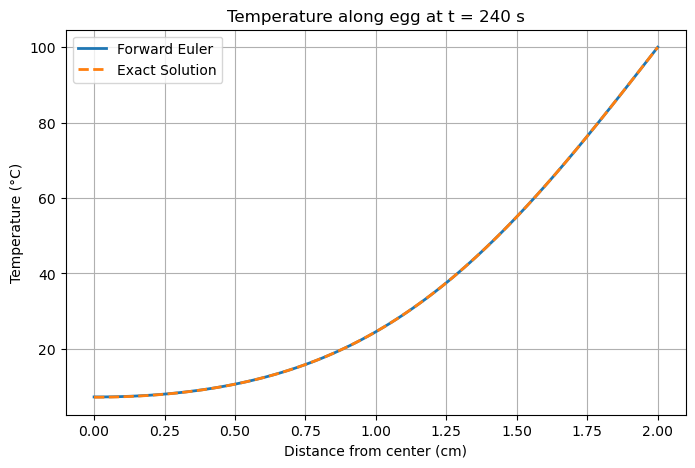

In [17]:
# Parameters
L = 0.02            # half-egg length [m]
T_0 = 5             # initial temperature [°C]
T_inf = 100         # water temperature [°C]
D = 1.3e-7          # thermal diffusivity [m^2/s]
Nx = 100            # spatial points
dx = L / (Nx-1)
dt = 0.25 * dx**2 / D  # stability criterion (CFL < 0.5)
t_final = 240  # final time [s]
N_terms = 50        # terms for exact solution

# Spatial grid
x = np.linspace(0, L, Nx)

#def f_euler(Nt, ):
# Forward Euler initialization
T = T_0 * np.ones_like(x)
T_new = np.copy(T)
Nt = int(t_final/dt)
# Time-stepping
for n in range(Nt):
    # Interior points
    T_new[1:-1] = T[1:-1] + D*dt/dx**2 * (T[2:] - 2*T[1:-1] + T[:-2])
    
    # Neumann BC at center (x=0)
    T_new[0] = T_new[1]
    
    # Dirichlet BC at shell
    T_new[-1] = T_inf
    
    # Update
    T[:] = T_new[:]
    
# Exact solution at final time
T_exact = exact_sol(T_inf, T_0, N_terms, L, x, t_final, D)
# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(x*100, T, label='Forward Euler', lw=2)
plt.plot(x*100, T_exact, '--', label='Exact Solution', lw=2)
plt.xlabel('Distance from center (cm)')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature along egg at t = {t_final} s')
plt.legend()
plt.grid(True)
plt.show()